In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

%matplotlib inline

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import matplotlib.pyplot as plt


In [ ]:
# Charger le fichier Excel
nom_fichier_excel = '/db_measurements_v2.1.0.xlsx'
df = pd.read_excel(nom_fichier_excel)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


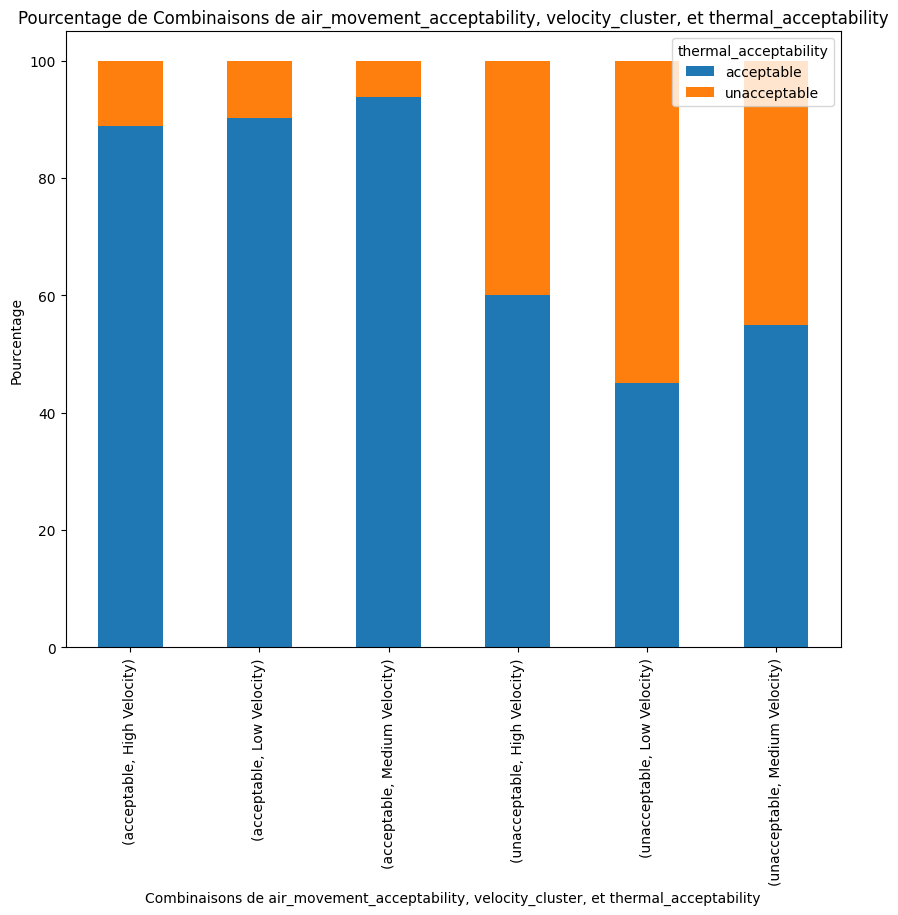

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Charger le fichier Excel
nom_fichier_excel = '/db_measurements_v2.1.0.xlsx'
df = pd.read_excel(nom_fichier_excel)

# Sélectionner les colonnes d'intérêt
colonne_variable1 = 'air_movement_acceptability'
colonne_variable2 = 'thermal_acceptability'
colonne_velocity = 'vel'  # Ajoutez la troisième colonne

df = df[[colonne_variable1, colonne_variable2, colonne_velocity]].dropna()

# Effectuer le clustering en trois clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['velocity_cluster'] = kmeans.fit_predict(df[[colonne_velocity]])

# Renommer les clusters
cluster_names = {
    0: 'Low Velocity',
    1: 'Medium Velocity',
    2: 'High Velocity'
}

df['velocity_cluster'] = df['velocity_cluster'].map(cluster_names)

colonne_variable3 = 'velocity_cluster'

# Compter les occurrences de chaque combinaison
comptage_combinaisons = df.groupby([colonne_variable1, colonne_variable3, colonne_variable2]).size().unstack().fillna(0)

# Calculer les pourcentages
pourcentage_by_interval = comptage_combinaisons.div(comptage_combinaisons.sum(axis=1), axis=0) * 100

# Tracer le graphique
fig, ax = plt.subplots(figsize=(10, 8))
pourcentage_by_interval.plot(kind='bar', stacked=True, ax=ax)

ax.set_ylabel('Pourcentage')
ax.set_xlabel(f'Combinaisons de {colonne_variable1}, {colonne_variable3}, et {colonne_variable2}')
plt.title(f'Pourcentage de Combinaisons de {colonne_variable1}, {colonne_variable3}, et {colonne_variable2}')

plt.show()




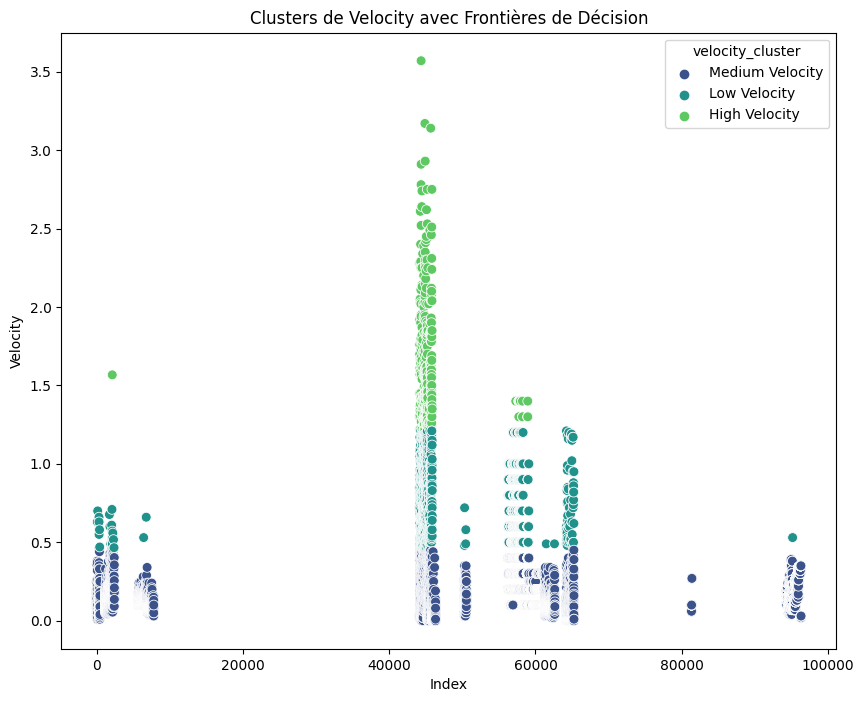

In [ ]:
palette = sns.color_palette("viridis", n_colors=len(cluster_names))

# Afficher un graphique des clusters avec les frontières de décision
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x=df.index, y=colonne_velocity, hue='velocity_cluster', palette=palette, s=50)
plt.title('Clusters de Velocity avec Frontières de Décision')
plt.xlabel('Index')
plt.ylabel('Velocity')
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


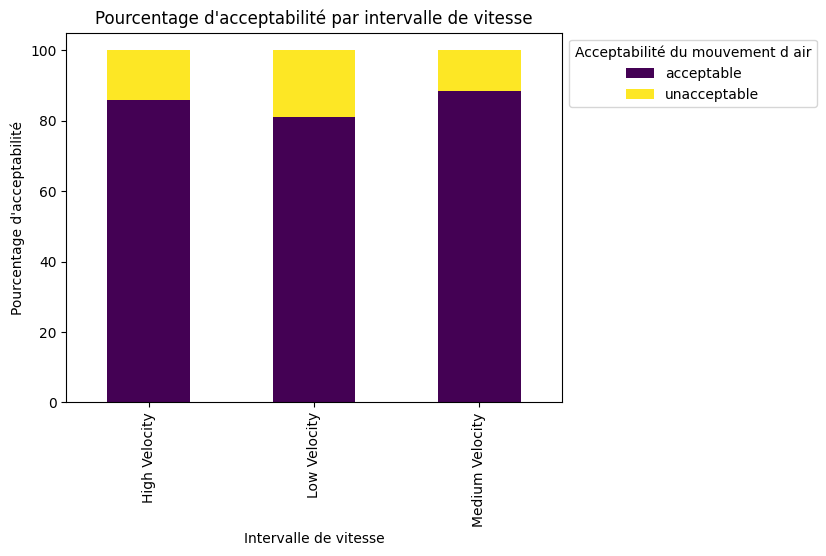

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Charger le fichier Excel
nom_fichier_excel = '/db_measurements_v2.1.0.xlsx'
df = pd.read_excel(nom_fichier_excel)

colonne_velocity = 'vel'  # Ajoutez la troisième colonne

df = df[['air_movement_acceptability', colonne_velocity]].dropna()

# Effectuer le clustering en trois clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['velocity_cluster'] = kmeans.fit_predict(df[[colonne_velocity]])

# Renommer les clusters
cluster_names = {
    0: 'Low Velocity',
    1: 'Medium Velocity',
    2: 'High Velocity'
}

df['velocity_cluster'] = df['velocity_cluster'].map(cluster_names)

# Calculer le pourcentage d'acceptabilité par intervalle
percentage_by_interval = df.groupby(['velocity_cluster', 'air_movement_acceptability']).size().unstack().fillna(0)

# Normaliser les valeurs pour que la somme soit égale à 100%
percentage_by_interval = percentage_by_interval.div(percentage_by_interval.sum(axis=1), axis=0) * 100

# Tracer le graphique
ax = percentage_by_interval.plot(kind='bar', stacked=True, colormap='viridis')

# Personnaliser le graphique
plt.title('Pourcentage d\'acceptabilité par intervalle de vitesse')
plt.xlabel('Intervalle de vitesse')
plt.ylabel('Pourcentage d\'acceptabilité')
plt.legend(title='Acceptabilité du mouvement d air', bbox_to_anchor=(1, 1))

# Afficher le graphique
plt.show()



In [ ]:

categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Variable catégorielle : {column}")
    print(f"Valeurs uniques : {unique_values}")
    print()


Variable catégorielle : timestamp
Valeurs uniques : ['1995-05-18T00:00:00Z' '1995-05-19T00:00:00Z' '1995-05-22T00:00:00Z' ...
 '2014-05-04T00:00:00Z' '2014-06-01T00:00:00Z' '2014-06-02T00:00:00Z']

Variable catégorielle : season
Valeurs uniques : ['winter' 'summer' 'cool/dry' 'hot/wet' 'spring' 'autumn' nan]

Variable catégorielle : subject_id
Valeurs uniques : [10 14 15 ... 'IT301008' 'IT301009' 'IT301018']

Variable catégorielle : gender
Valeurs uniques : ['female' 'male' nan 'undefined']

Variable catégorielle : thermal_acceptability
Valeurs uniques : ['acceptable' 'unacceptable' nan]

Variable catégorielle : thermal_preference
Valeurs uniques : ['cooler' 'no change' 'warmer' nan]

Variable catégorielle : air_movement_acceptability
Valeurs uniques : ['unacceptable' 'acceptable' nan]

Variable catégorielle : air_movement_preference
Valeurs uniques : ['more' 'no change' nan 'less']



In [ ]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger le fichier Excel (ajustez le chemin du fichier en conséquence)
nom_fichier_excel = '/db_measurements_v2.1.0.xlsx'

# Supposons que df soit votre DataFrame
df = pd.read_excel(nom_fichier_excel)

#Ajout des colonnes categoriales transformés en numérique sinon on peut enlever
df['air_movement_preference_score'] = df['air_movement_preference'].map({'less': -1, 'no change': 0, 'more': 1})
df['air_movement_acceptability_score'] = df['air_movement_acceptability'].map({'unacceptable': -1, 'acceptable': 1})
df['thermal_preference_score']= df['thermal_preference'].map({'cooler':-1, 'no change': 0, 'warmer': 1})
df['thermal_acceptability_score']= df['thermal_acceptability'].map({'unacceptable': -1, 'acceptable': 1})
df['gender_score']= df['gender'].map({'female': -1, 'male': 1,'undefined':0})
df['season_score']= df['season'].map({'winter':-3,'cool/dry':-2,'autumn':-1,'spring':1,'hot/wet':2,'summer':3})

# Calculer la matrice de corrélation
matrice_correlation = df.corr()



<ipython-input-33-6a58a0dd30ae>:21: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrice_correlation = df.corr()


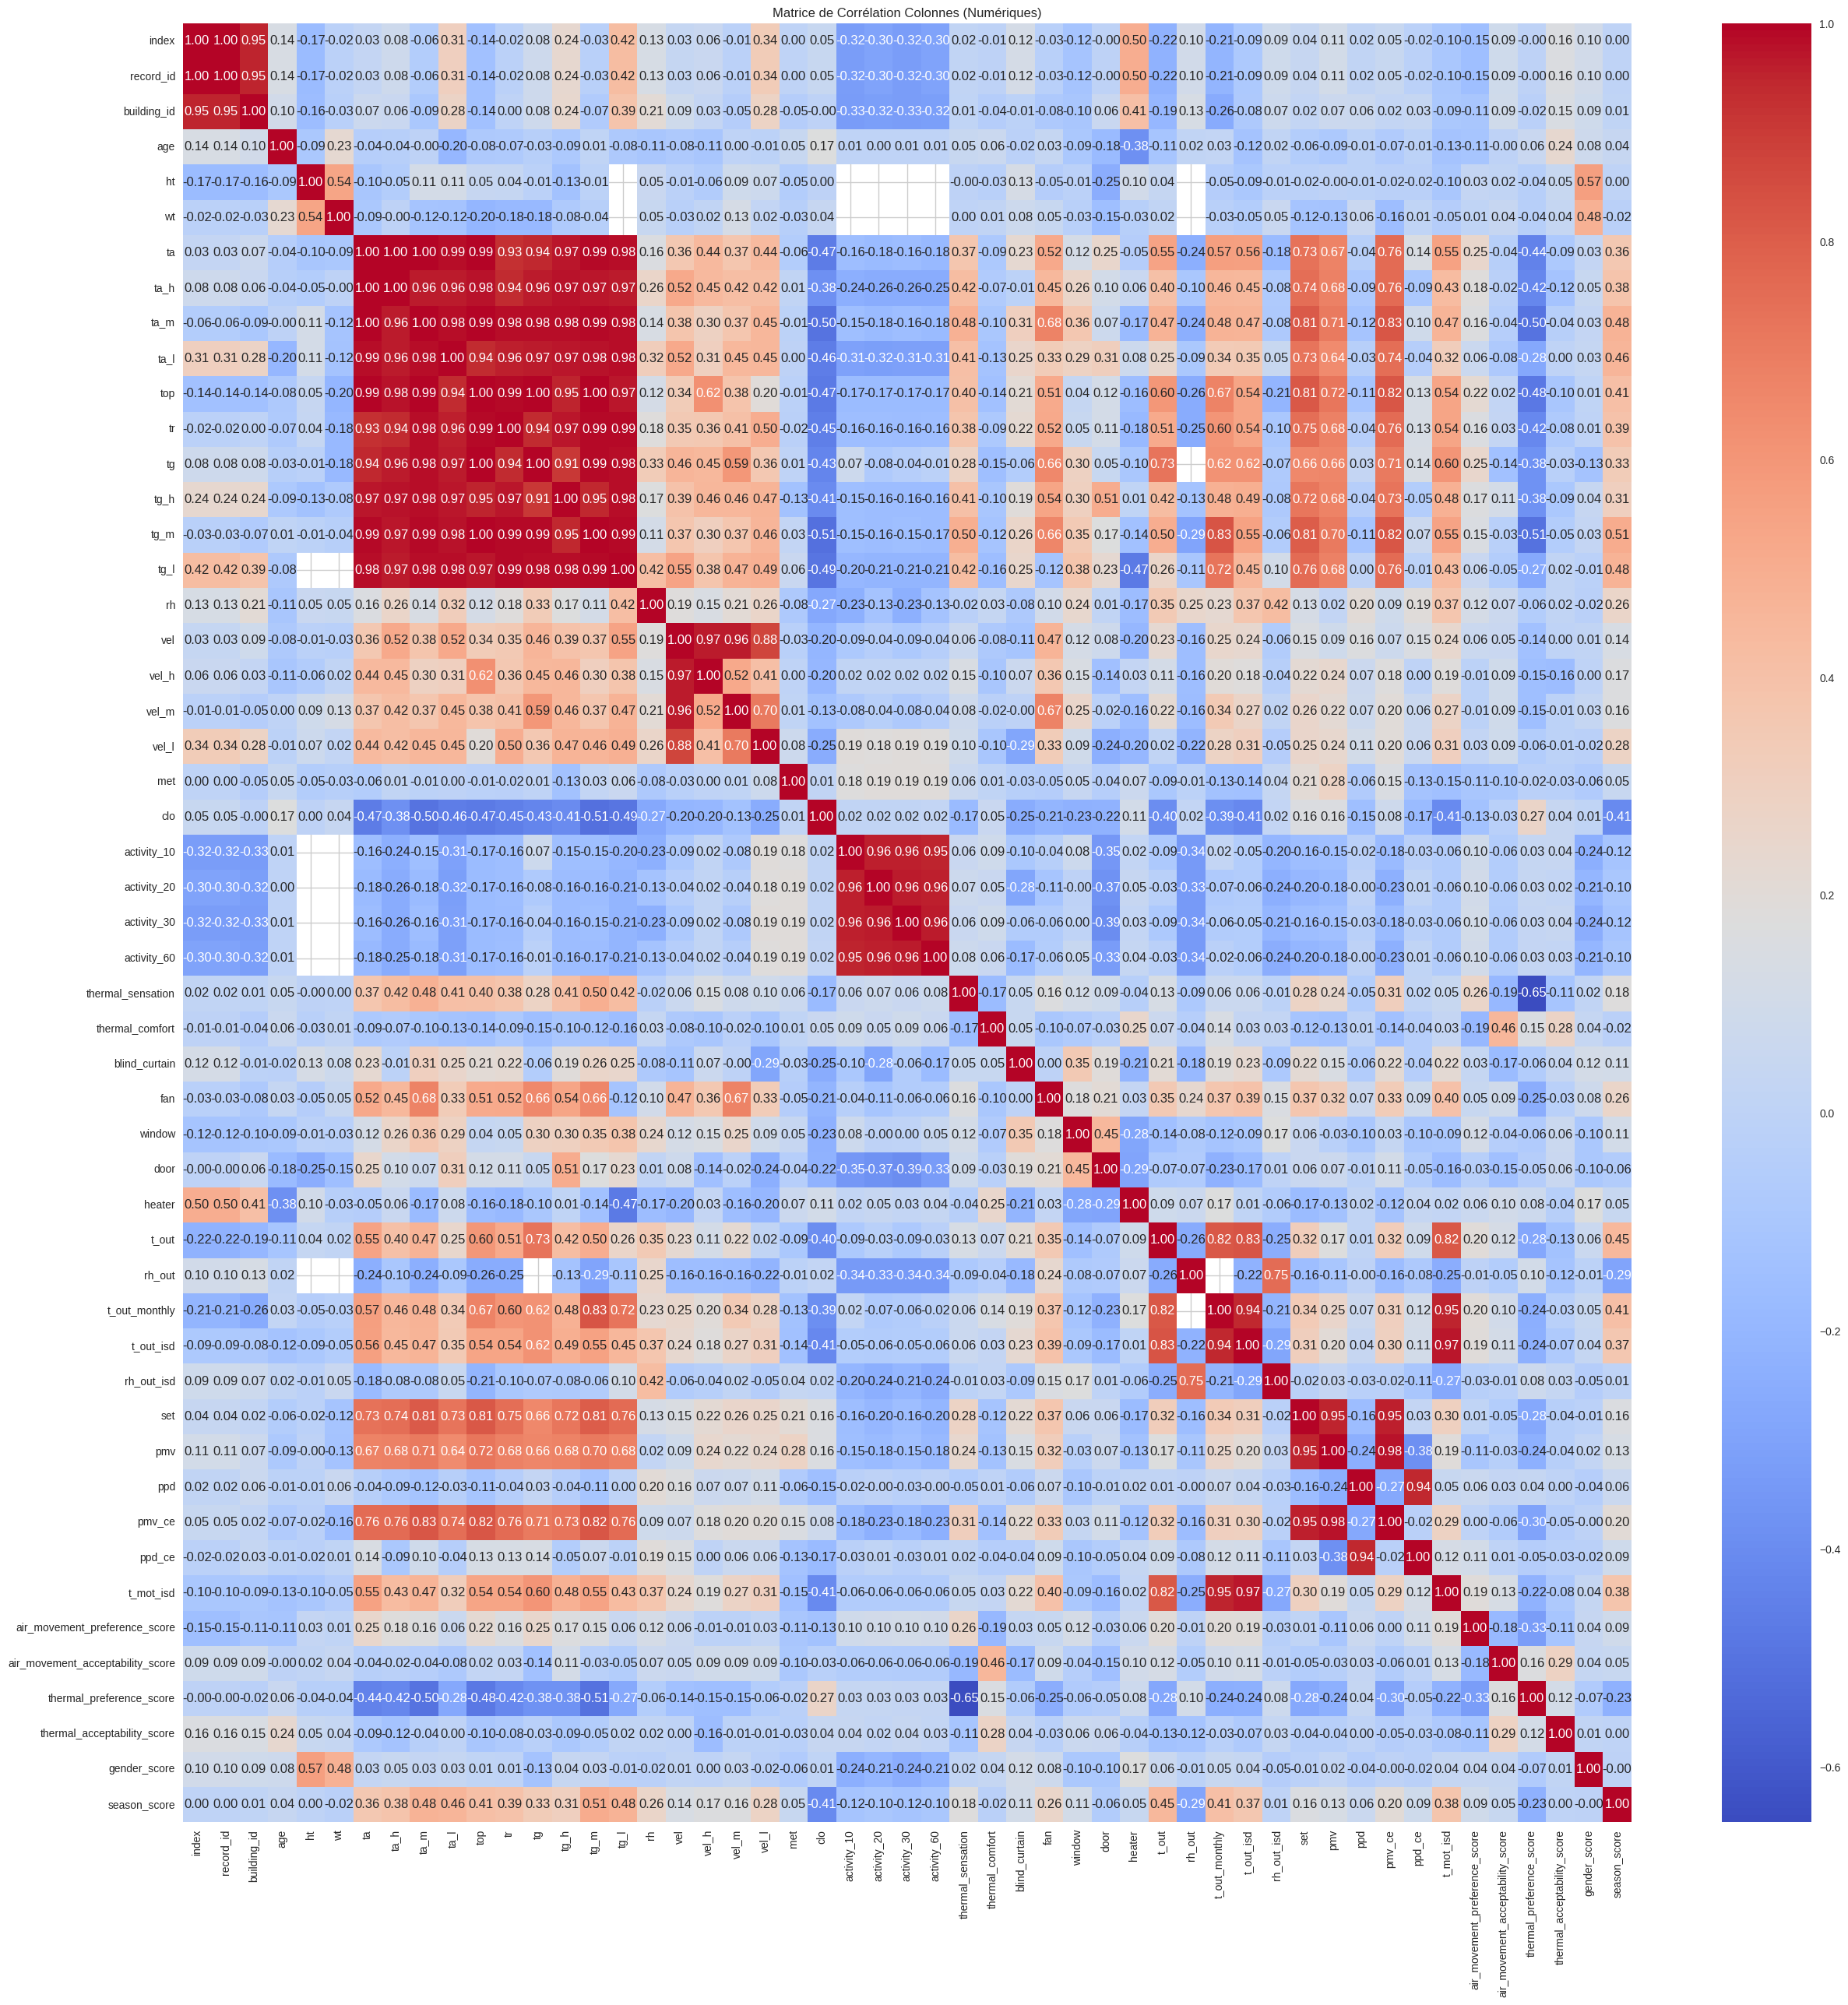

In [ ]:
# Tracer la heatmap avec Seaborn
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 30))
sns.heatmap(matrice_correlation, annot=True, cmap='coolwarm', fmt=".2f")

# Ajouter un titre
plt.title('Matrice de Corrélation Colonnes (Numériques)')

# Afficher le graphique
plt.show()

In [ ]:
!pip install prince
!pip install yellowbrick

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.6/415.6 kB 2.3 MB/s eta 0:00:00


Accuracy: 0.9035916824196597
Confusion Matrix:
[[268  24]
 [ 27 210]]


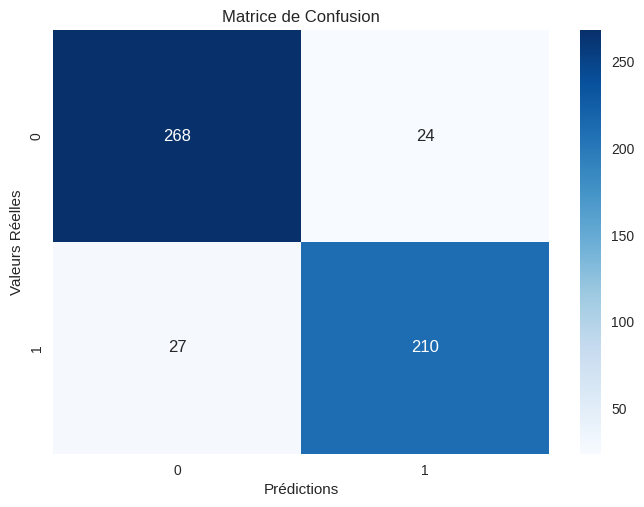

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Sélectionnez les colonnes pertinentes
df_predictors = df[['tg', 'vel_m', 'fan', 'ta_m', 'tg_m']]

# Supprimez les lignes contenant des valeurs manquantes dans l'ensemble de données
df_clean = df_predictors.dropna()

# Sélectionnez les colonnes 'tg', 'vel_m', 'ta_m', 'tg_m' comme prédicteurs et 'fan' comme variable dépendante
df_predictors_clean = df_clean[['tg', 'vel_m', 'ta_m', 'tg_m']]
target_variable = 'fan'

# Divisez les données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(df_predictors_clean, df_clean[target_variable], test_size=0.2, random_state=42)

# Instanciez et ajustez le modèle de régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)

# Faites des prédictions sur l'ensemble de test
predictions = model.predict(X_test)

# Évaluez la performance du modèle
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

# Affichez les résultats
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')

# Tracez la matrice de confusion avec seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédictions')
plt.ylabel('Valeurs Réelles')
plt.title('Matrice de Confusion')
plt.show()


Accuracy: 0.9230769230769231
Confusion Matrix:
[[11  1]
 [ 0  1]]


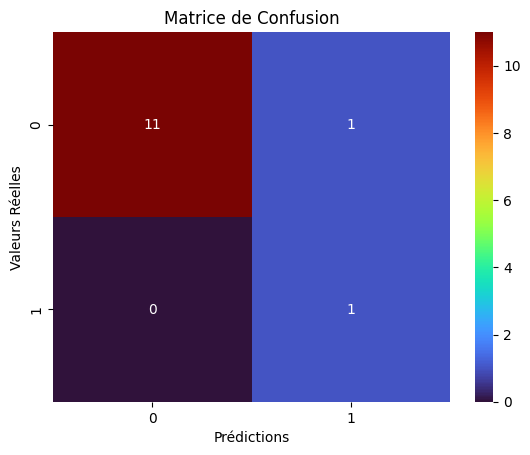

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



# Sélectionnez les colonnes pertinentes
df_predictors = df[['door', 'blind_curtain', 'window', 'ta_m', 'tg']]

# Supprimez les lignes contenant des valeurs manquantes dans l'ensemble de données
df_clean = df_predictors.dropna()

# Sélectionnez les colonnes 'tg', 'vel_m', 'ta_m', 'tg_m' comme prédicteurs et 'fan' comme variable dépendante
df_predictors_clean = df_clean[['door', 'blind_curtain', 'ta_m', 'tg']]
target_variable = 'window'

X_train, X_test, y_train, y_test = train_test_split(df_clean[['door', 'blind_curtain', 'ta_m', 'tg']], df_clean[target_variable], test_size=0.3, random_state=42)

# Instanciez et ajustez le modèle de régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)

# Faites des prédictions sur l'ensemble de test
predictions = model.predict(X_test)

# Évaluez la performance du modèle
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

# Affichez les résultats
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')

# Tracez la matrice de confusion avec seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='turbo')
plt.xlabel('Prédictions')
plt.ylabel('Valeurs Réelles')
plt.title('Matrice de Confusion')
plt.show()

In [ ]:
len(df_clean)

41

In [ ]:
from datetime import datetime
import pytz

# Charger le fichier avec les informations de fuseau horaire
timezone_info_file = '/db_metadata.xlsx'  # Remplacez par le nom de votre fichier
timezone_info_df = pd.read_excel(timezone_info_file)

# Charger le fichier avec les valeurs UTC
utc_data_file = '/db_measurements_v2.1.0.xlsx'  # Remplacez par le nom de votre fichier
utc_data_df = pd.read_excel(utc_data_file)



In [ ]:
# Fusionner les deux DataFrames sur la colonne 'building_id'
merged_df = pd.merge(utc_data_df, timezone_info_df, on='building_id')

# Convertir les colonnes de temps UTC en objets datetime
merged_df['timestamp'] = pd.to_datetime(merged_df['timestamp'], format='%Y-%m-%dT%H:%M:%SZ')

# Éliminer les lignes où 'utc_time' a des valeurs NaN
merged_df = merged_df.dropna(subset=['blind_curtain'])
merged_df = merged_df.dropna(subset=['timezone'])

def convert_to_local_time(row):
    utc_time = row['timestamp']

    if pd.notna(row['timezone']) and not pd.isna(utc_time):  # Vérifier si le fuseau horaire n'est pas NaN et 'timestamp' n'est pas NaN
        utc_timezone = pytz.timezone('UTC')
        utc_time = utc_timezone.localize(utc_time)

        local_timezone = pytz.timezone(str(row['timezone']))  # Convertir le fuseau horaire en chaîne
        local_time = utc_time.astimezone(local_timezone)

        # Formater l'heure locale en format "00:00"
        local_time_formatted = local_time.strftime("%H:%M")
        return local_time_formatted
    else:
        return None  # Gérer le cas où le fuseau horaire ou 'timestamp

merged_df['local_time'] = merged_df.apply(convert_to_local_time, axis=1)

# Afficher le résultat
merged_df[['building_id', 'timestamp', 'timezone', 'local_time', 'blind_curtain']]


building_id  timestamp      timezone local_time  blind_curtain
15566          166 2018-08-19  Asia/Kolkata      05:30            1.0
15567          166 2018-08-19  Asia/Kolkata      05:30            1.0
15568          166 2018-08-19  Asia/Kolkata      05:30            0.0
15569          166 2018-08-19  Asia/Kolkata      05:30            1.0
15570          166 2018-08-19  Asia/Kolkata      05:30            1.0
...            ...        ...           ...        ...            ...
81596          670 2007-10-12    Asia/Seoul      09:00            1.0
81597          670 2007-10-12    Asia/Seoul      09:00            0.0
81598          670 2007-10-12    Asia/Seoul      09:00            1.0
81599          670 2007-10-12    Asia/Seoul      09:00            1.0
81600          670 2007-10-12    Asia/Seoul      09:00            1.0

[7448 rows x 5 columns]

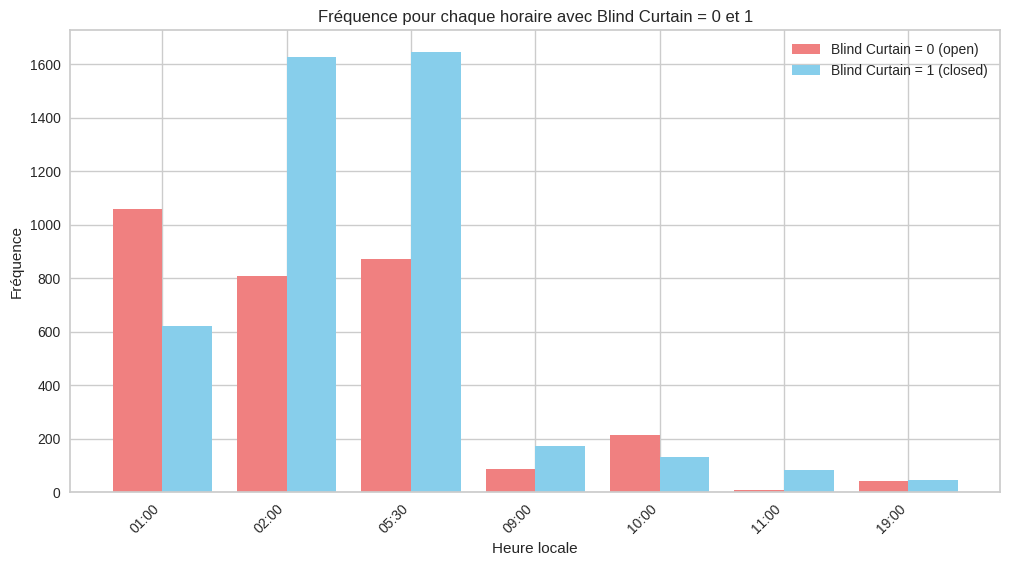

In [ ]:
# Filtrer les lignes où 'blind_curtain' est égal à 0 et 1
filtered_df_0 = merged_df[merged_df['blind_curtain'] == 0]
filtered_df_1 = merged_df[merged_df['blind_curtain'] == 1]

# Supprimer les lignes dupliquées basées sur la colonne 'local_time'
filtered_df_unique_0 = filtered_df_0.drop_duplicates(subset=['local_time'])
filtered_df_unique_1 = filtered_df_1.drop_duplicates(subset=['local_time'])

# Calculer la fréquence pour chaque horaire
heure_counts_0 = filtered_df_0['local_time'].value_counts()
heure_counts_1 = filtered_df_1['local_time'].value_counts()

# Trier les résultats par heure
heure_counts_0 = heure_counts_0.sort_index()
heure_counts_1 = heure_counts_1.sort_index()

# Créer un graphique à barres groupées
bar_width = 0.4
index = np.arange(len(heure_counts_0.index))

plt.figure(figsize=(12, 6))
plt.bar(index, heure_counts_0, width=bar_width, color='lightcoral', label='Blind Curtain = 0 (open)')
plt.bar(index + bar_width, heure_counts_1, width=bar_width, color='skyblue', label='Blind Curtain = 1 (closed)')

plt.title('Fréquence pour chaque horaire avec Blind Curtain = 0 et 1')
plt.xlabel('Heure locale')
plt.ylabel('Fréquence')
plt.xticks(index + bar_width / 2, heure_counts_0.index, rotation=45, ha='right')  # Pour une meilleure lisibilité des étiquettes d'heure
plt.legend()
plt.show()




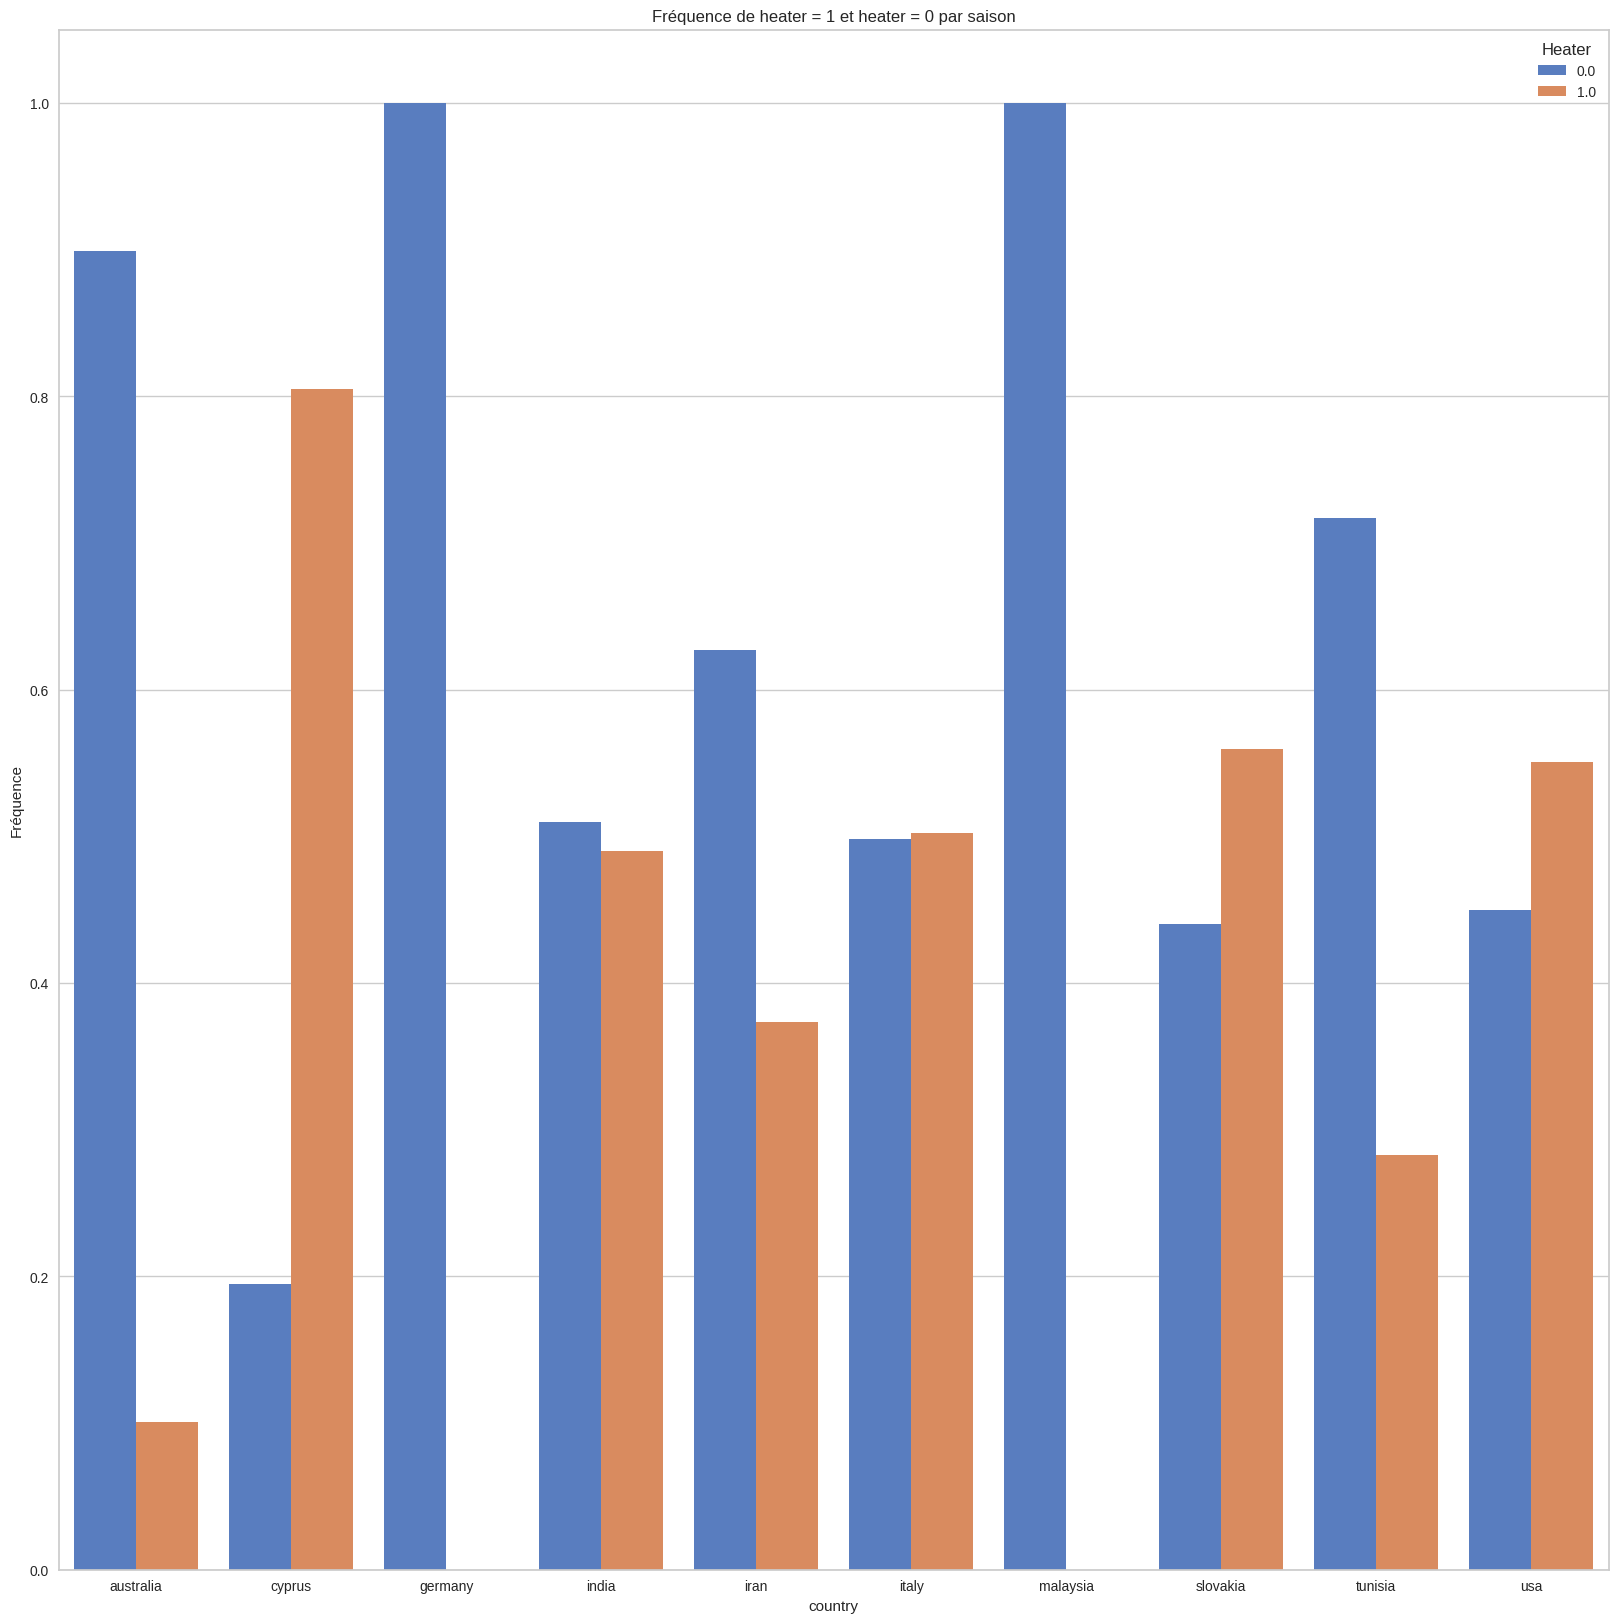

In [ ]:

# Charger votre DataFrame existant 
df = pd.read_excel('/db_measurements_v2.1.0.xlsx')  

# Charger le fichier contenant la colonne "Saison" et "building_id"
fichier_saison = pd.read_excel('/db_metadata.xlsx')  

# Fusionner les deux DataFrames sur la colonne "building_id"
df = pd.merge(df, fichier_saison[['building_id', 'country']], on='building_id', how='left')

# Grouper les données par saison et heater, puis compter le nombre d'occurrences
grouped_counts = df.groupby(['country', 'heater']).size().reset_index(name='count')

# Calculer la fréquence pour chaque groupe
grouped_counts['frequency'] = grouped_counts.groupby('country')['count'].transform(lambda x: x / x.sum())

# Afficher le graphique
plt.figure(figsize=(20, 20))
sns.barplot(data=grouped_counts, x='country', y='frequency', hue='heater', palette='muted')
plt.title('Fréquence de heater = 1 et heater = 0 par saison')
plt.xlabel('country')
plt.ylabel('Fréquence')
plt.legend(title='Heater', loc='upper right')
plt.show()





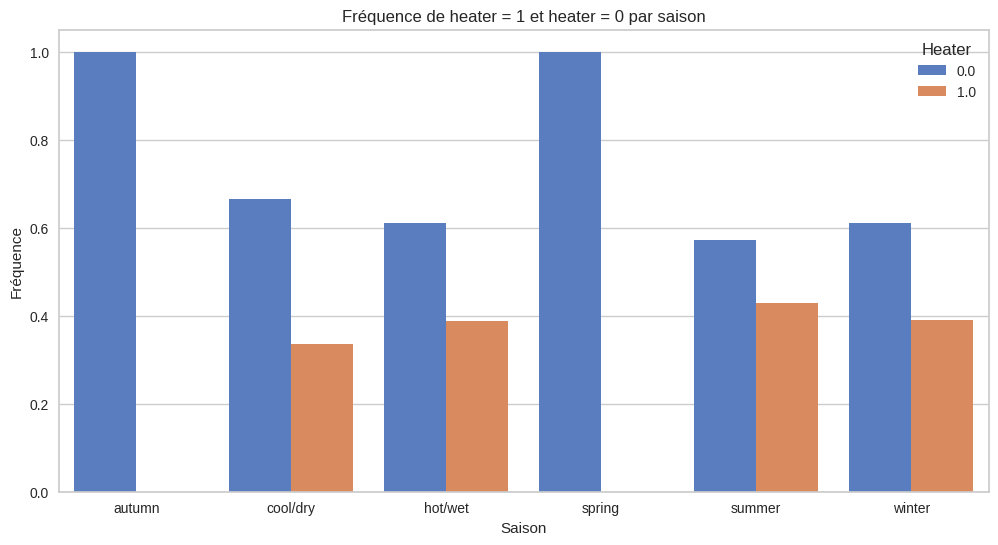

In [ ]:
df = pd.read_excel('/db_measurements_v2.1.0.xlsx')  # Remplacez 'votre_fichier.csv' par le nom de votre fichier

# Charger le fichier contenant la colonne "Saison" et "building_id"
fichier_saison = pd.read_excel('/db_metadata.xlsx')  # Remplacez 'votre_autre_fichier.csv' par le nom de votre fichier

# Fusionner les deux DataFrames sur la colonne "building_id"
df = pd.merge(df, fichier_saison[['building_id', 'country']], on='building_id', how='left')


# Grouper les données par saison et heater, puis compter le nombre d'occurrences
grouped_counts = df.groupby(['season', 'heater']).size().reset_index(name='count')

# Calculer la fréquence pour chaque groupe
grouped_counts['frequency'] = grouped_counts.groupby('season')['count'].transform(lambda x: x / x.sum())

# Afficher le graphique
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_counts, x='season', y='frequency', hue='heater', palette='muted')
plt.title('Fréquence de heater = 1 et heater = 0 par saison')
plt.xlabel('Saison')
plt.ylabel('Fréquence')
plt.legend(title='Heater', loc='upper right')
plt.show()


In [ ]:
# Filtrer le DataFrame pour inclure uniquement les lignes avec heater=1
df_heater_1_summer = df[(df['heater'] == 1) & (df['season'] == 'summer')]
countries_heater_1_summer = df_heater_1_summer['country'].drop_duplicates()
print(countries_heater_1_summer)

frequency_countries_heater_1_summer = df_heater_1_summer['country'].value_counts()
print(frequency_countries_heater_1_summer)


49353     cyprus
50872    tunisia
67891        usa
85155      india
Name: country, dtype: object
india      1426
usa         412
tunisia     271
cyprus       33
Name: country, dtype: int64


In [ ]:
# Filtrer le DataFrame pour inclure uniquement les lignes avec heater=1
df_heater_1_summer = df[(df['heater'] == 0) & (df['season'] == 'winter')]
countries_heater_1_summer = df_heater_1_summer['country'].drop_duplicates()
print(countries_heater_1_summer)

frequency_countries_heater_1_summer = df_heater_1_summer['country'].value_counts()
print(frequency_countries_heater_1_summer)

42643         italy
44176         india
51093       tunisia
62013     australia
66695       germany
68632           usa
108440         iran
Name: country, dtype: object
india        717
australia    435
tunisia      416
iran         309
usa          299
germany      136
italy         24
Name: country, dtype: int64


In [1]:
import pandas as pd
import plotly.express as px

df = pd.read_excel('/db_measurements_v2.1.0.xlsx')  # Remplacez 'votre_fichier.csv' par le nom de votre fichier

# Charger le fichier contenant la colonne "Saison", "building_id", et "country"
fichier_saison = pd.read_excel('/db_metadata.xlsx')  # Remplacez 'votre_autre_fichier.csv' par le nom de votre fichier

# Fusionner les deux DataFrames sur la colonne "building_id"
df = pd.merge(df, fichier_saison[['building_id', 'country']], on='building_id', how='left')

# Grouper les données par saison, heater et pays, puis compter le nombre d'occurrences
grouped_counts = df.groupby(['season', 'heater', 'country']).size().reset_index(name='count')

# Calculer la fréquence pour chaque groupe
grouped_counts['frequency'] = grouped_counts.groupby(['season', 'country'])['count'].transform(lambda x: x / x.sum())

# Créer un graphique 3D interactif avec plotly
fig = px.scatter_3d(grouped_counts, x='season', y='country', z='frequency', color='heater',
                    labels={'frequency': 'Fréquence', 'heater': 'Heater'},
                    title='Fréquence de heater = 1 et heater = 0 par saison et par pays',
                    opacity=0.7)

# Afficher le graphique
fig.show()


FileNotFoundError: [Errno 2] No such file or directory: '/db_metadata.xlsx'

In [ ]:
#la nouvelle colonne combined_pca_variable est créée en utilisant une combinaison linéaire des variables 'pmv' et 'thermal_sensation'
#qui capture la variance maximale dans les données standardisées. Cette nouvelle variable représente une version compressée des informations
#contenues dans les deux variables d'origine.

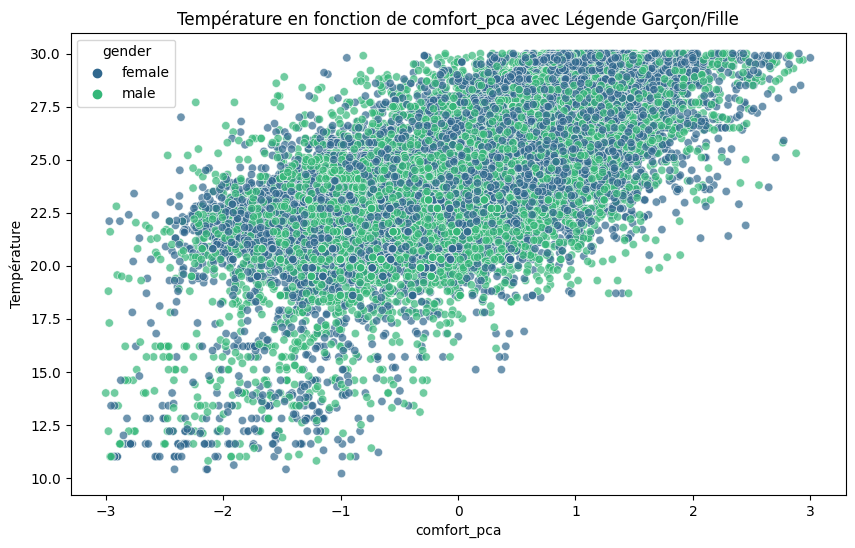

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Supposons que df soit votre DataFrame avec les colonnes 'pmv', 'ce', 'thermal_sensation', 'gender', 'temperature'

# Supprimez les lignes contenant des valeurs manquantes
df_clean = df[['pmv', 'thermal_sensation', 'gender', 'ta']].dropna()

# Sélectionnez les variables à inclure dans la PCA
variables = df_clean[['pmv', 'thermal_sensation']]

# Standardisez les variables
scaler = StandardScaler()
scaled_variables = scaler.fit_transform(variables)

# Appliquez la PCA avec le nombre de composantes principales souhaité (ici, 1)
pca = PCA(n_components=1)
new_variable = pca.fit_transform(scaled_variables)

# Ajoutez la nouvelle variable au DataFrame
df_clean['combined_pca_variable'] = new_variable


# Normaliser la variable combined_pca_variable de -3 à 3
min_value = -3
max_value = 3

# Appliquer la normalisation Min-Max
df_clean['combined_pca_variable'] = (df_clean['combined_pca_variable'] - df_clean['combined_pca_variable'].min()) / (df_clean['combined_pca_variable'].max() - df_clean['combined_pca_variable'].min()) * (max_value - min_value) + min_value

# Créez un diagramme de dispersion avec Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='combined_pca_variable', y='ta', hue='gender', data=df_clean, palette='viridis', alpha=0.7)

# Ajoutez des légendes et des titres
plt.title('Température en fonction de comfort_pca avec Légende Garçon/Fille')
plt.xlabel('comfort_pca')
plt.ylabel('Température')


# Affichez le graphique
plt.show()





In [ ]:
min_value = df_selected['combined_pca_variable'].min()
max_value = df_selected['combined_pca_variable'].max()

print(f"Plage de variation de Combined PCA Variable : [{min_value}, {max_value}]")

Plage de variation de Combined PCA Variable : [-3.507842097528012, 3.848526999493486]


In [ ]:
w = pca.components_[0]
print(w)

[0.70710678 0.70710678]


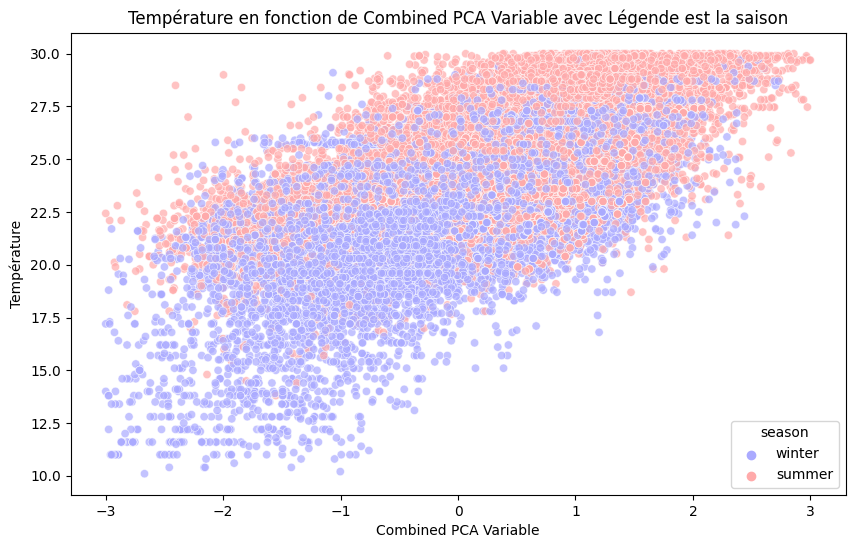

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Supposons que df soit votre DataFrame avec les colonnes 'pmv', 'ce', 'thermal_sensation', 'gender', 'temperature', 'season'

# Supprimez les lignes contenant des valeurs manquantes
df_clean = df[['pmv', 'thermal_sensation', 'ta', 'season']].dropna()

# Sélectionnez les saisons d'hiver et d'été
selected_seasons = ['winter', 'summer']
df_clean = df_clean[df_clean['season'].isin(selected_seasons)]

# Sélectionnez les variables à inclure dans la PCA
variables = df_clean[['pmv', 'thermal_sensation']]

# Standardisez les variables
scaler = StandardScaler()
scaled_variables = scaler.fit_transform(variables)

# Appliquez la PCA avec le nombre de composantes principales souhaité (ici, 1)
pca = PCA(n_components=1)
new_variable = pca.fit_transform(scaled_variables)

# Ajoutez la nouvelle variable au DataFrame
df_clean['combined_pca_variable'] = new_variable

# Normaliser la variable combined_pca_variable de -3 à 3
min_value = -3
max_value = 3

# Appliquer la normalisation Min-Max
df_clean['combined_pca_variable'] = (df_clean['combined_pca_variable'] - df_clean['combined_pca_variable'].min()) / (df_clean['combined_pca_variable'].max() - df_clean['combined_pca_variable'].min()) * (max_value - min_value) + min_value

# Créez un diagramme de dispersion avec Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='combined_pca_variable', y='ta', hue='season', data=df_clean, palette='bwr', alpha=0.7)

# Ajoutez des légendes et des titres
plt.title('Température en fonction de Combined PCA Variable avec Légende est la saison')
plt.xlabel('Combined PCA Variable')
plt.ylabel('Température')

# Affichez le graphique
plt.show()


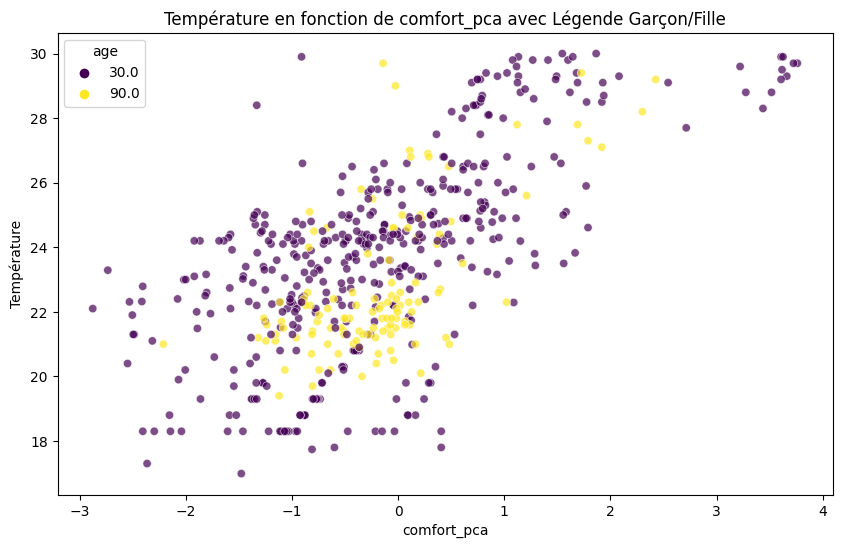

In [ ]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Supprimez les lignes contenant des valeurs manquantes
df_clean = df[['pmv', 'thermal_sensation', 'age', 'ta']].dropna()

# Sélectionnez les variables à inclure dans la PCA
variables = df_clean[['pmv', 'thermal_sensation']]

# Standardisez les variables
scaler = StandardScaler()
scaled_variables = scaler.fit_transform(variables)

# Appliquez la PCA avec le nombre de composantes principales souhaité (ici, 1)
pca = PCA(n_components=1)
new_variable = pca.fit_transform(scaled_variables)

# Ajoutez la nouvelle variable au DataFrame
df_clean['combined_pca_variable'] = new_variable

# Sélectionnez les âges 15, 70 et 90
selected_ages = [30, 90]
df_selected_ages = df_clean[df_clean['age'].isin(selected_ages)]

# Créez un diagramme de dispersion avec Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='combined_pca_variable', y='ta', hue='age', data=df_selected_ages, palette='viridis', alpha=0.7)

# Ajoutez des légendes et des titres
plt.title('Température en fonction de comfort_pca avec Légende Garçon/Fille')
plt.xlabel('comfort_pca')
plt.ylabel('Température')

# Affichez le graphique
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Chargement du fichier contenant Combined PCA Variable
df_combined_pca = pd.read_excel('/db_measurements_v2.1.0.xlsx')  # Assurez-vous d'ajuster le chemin du fichier

# Chargement du fichier contenant le climat et le building_id
df_climate = pd.read_excel('/db_metadata.xlsx')  # Assurez-vous d'ajuster le chemin du fichier


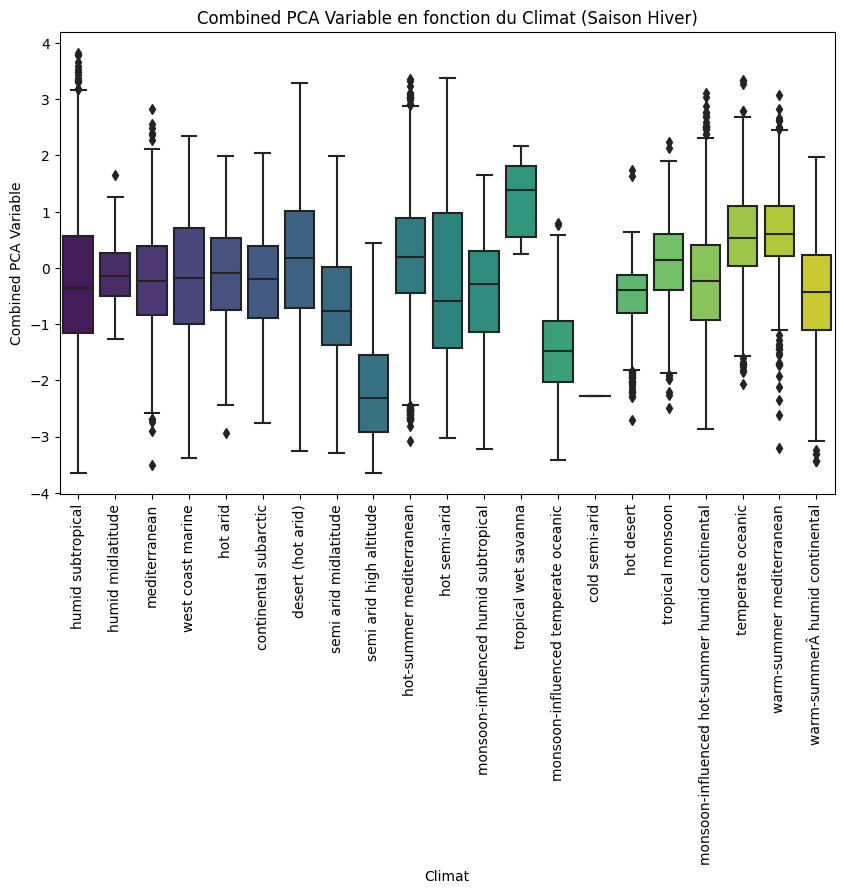

In [ ]:

# Fusion des deux DataFrames sur building_id
df_merged = pd.merge(df_combined_pca, df_climate, on='building_id', how='inner')

# Filtrer les données pour la saison hiver
df_winter = df_merged[df_merged['season'] == 'winter']

# Sélectionner uniquement les colonnes 'pmv', 'thermal_sensation' et 'climate'
df_winter = df_winter[['pmv', 'thermal_sensation', 'climate']]

# Supprimer les lignes avec des valeurs manquantes
df_winter = df_winter.dropna()

# Sélectionnez les variables à inclure dans la PCA
variables = df_winter[['pmv', 'thermal_sensation']]

# Standardisez les variables
scaler = StandardScaler()
scaled_variables = scaler.fit_transform(variables)

# Appliquez la PCA avec le nombre de composantes principales souhaité (ici, 1)
pca = PCA(n_components=1)
new_variable = pca.fit_transform(scaled_variables)

# Ajoutez la nouvelle variable au DataFrame
df_winter['combined_pca_variable'] = new_variable

# Création de la figure
plt.figure(figsize=(10, 6))

# Tracé de la Combined PCA Variable par rapport au climat pour la saison hiver
sns.boxplot(x='climate', y='combined_pca_variable', data=df_winter, palette='viridis')

# Ajout des labels et du titre
plt.xlabel('Climat')
plt.ylabel('Combined PCA Variable')
plt.title('Combined PCA Variable en fonction du Climat (Saison Hiver)')

# Rotation des étiquettes sur l'axe des x (climat) à 90 degrés
plt.xticks(rotation=90)

# Affichage de la figure
plt.show()



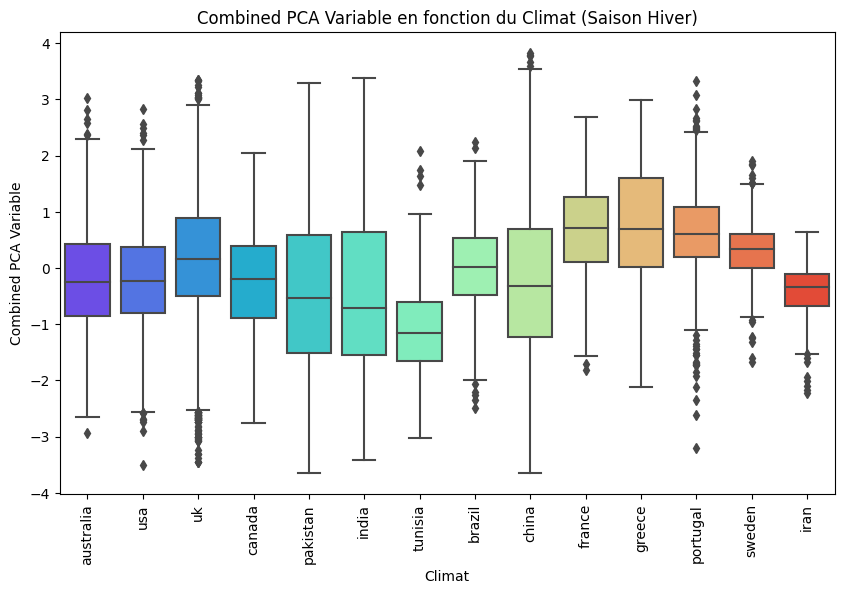

In [ ]:
df_merged = pd.merge(df_combined_pca, df_climate, on='building_id', how='inner')

# Filtrer les données pour la saison hiver
df_winter = df_merged[df_merged['season'] == 'winter']

# Sélectionner uniquement les colonnes 'pmv', 'thermal_sensation' et 'climate'
df_winter = df_winter[['pmv', 'thermal_sensation', 'country']]

# Supprimer les lignes avec des valeurs manquantes
df_winter = df_winter.dropna()

# Sélectionnez les variables à inclure dans la PCA
variables = df_winter[['pmv', 'thermal_sensation']]

# Standardisez les variables
scaler = StandardScaler()
scaled_variables = scaler.fit_transform(variables)

# Appliquez la PCA avec le nombre de composantes principales souhaité (ici, 1)
pca = PCA(n_components=1)
new_variable = pca.fit_transform(scaled_variables)

# Ajoutez la nouvelle variable au DataFrame
df_winter['combined_pca_variable'] = new_variable

# Création de la figure
plt.figure(figsize=(10, 6))

# Tracé de la Combined PCA Variable par rapport au climat pour la saison hiver
sns.boxplot(x='country', y='combined_pca_variable', data=df_winter, palette='rainbow')

# Ajout des labels et du titre
plt.xlabel('Climat')
plt.ylabel('Combined PCA Variable')
plt.title('Combined PCA Variable en fonction du Climat (Saison Hiver)')

# Rotation des étiquettes sur l'axe des x (climat) à 90 degrés
plt.xticks(rotation=90)

# Affichage de la figure
plt.show()

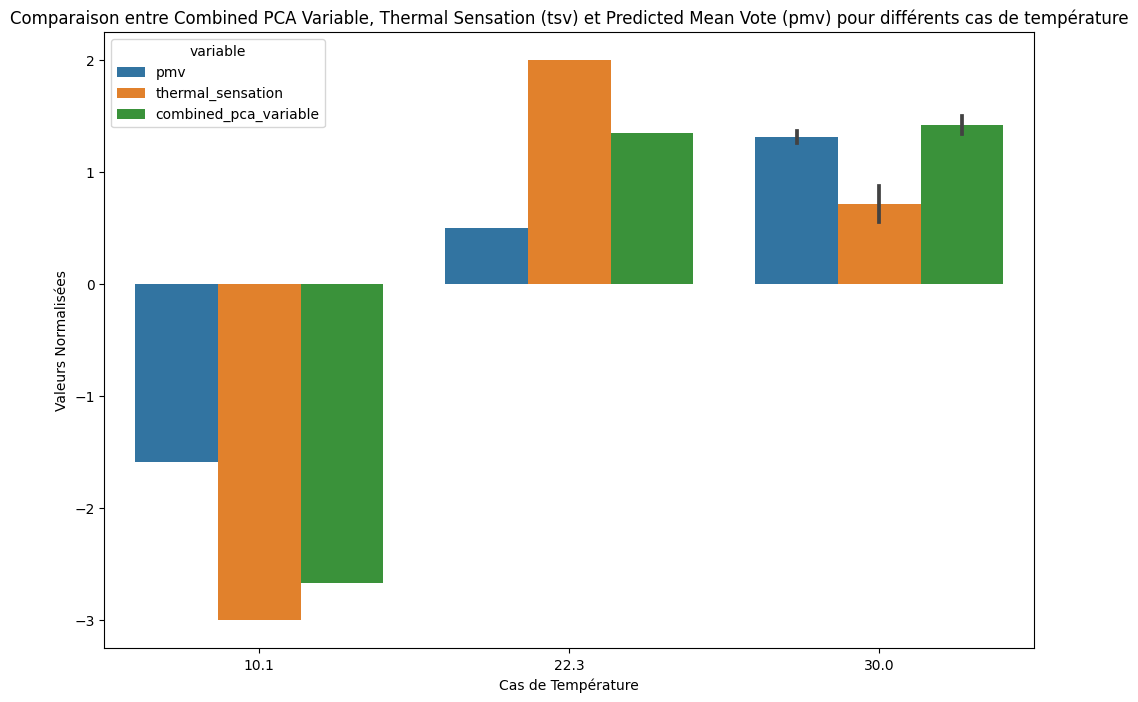

In [12]:
# Supprimez les lignes contenant des valeurs manquantes
df_clean = df[['pmv', 'thermal_sensation', 'ta']].dropna()

# Sélectionnez les variables à inclure dans la PCA
variables = df_clean[['pmv', 'thermal_sensation']]

# Standardisez les variables
scaler = StandardScaler()
scaled_variables = scaler.fit_transform(variables)

# Appliquez la PCA avec le nombre de composantes principales souhaité (ici, 1)
pca = PCA(n_components=1)
new_variable = pca.fit_transform(scaled_variables)

# Ajoutez la nouvelle variable au DataFrame
df_clean['combined_pca_variable'] = new_variable

# Normaliser la variable combined_pca_variable de -3 à 3
min_value = -3
max_value = 3

# Appliquer la normalisation Min-Max
df_clean['combined_pca_variable'] = (df_clean['combined_pca_variable'] - df_clean['combined_pca_variable'].min()) / (df_clean['combined_pca_variable'].max() - df_clean['combined_pca_variable'].min()) * (max_value - min_value) + min_value

# Supprimer les lignes avec des valeurs manquantes
df_selected = df_clean

# Création de sous-ensembles de données pour chaque cas de température (min, max, moyenne)
df_min_temp = df_selected[df_selected['ta'] == df_selected['ta'].min()]
df_max_temp = df_selected[df_selected['ta'] == df_selected['ta'].max()]
value_between_min_max = df_selected[(df_selected['ta'] > df_selected['ta'].min()) &
                                     (df_selected['ta'] < df_selected['ta'].max())].iloc[0]

df_between_min_max = pd.DataFrame(value_between_min_max).transpose()

# Fusionner les trois sous-ensembles de données pour faciliter la visualisation
df_comparison = pd.concat([df_min_temp, df_max_temp, df_between_min_max])

# Création de la figure
plt.figure(figsize=(12, 8))

# Tracé des barres groupées
sns.barplot(x='ta', y='value', hue='variable', data=pd.melt(df_comparison, id_vars=['ta']))

# Ajout des labels et du titre
plt.xlabel('Cas de Température')
plt.ylabel('Valeurs Normalisées')
plt.title('Comparaison entre Combined PCA Variable, Thermal Sensation (tsv) et Predicted Mean Vote (pmv) pour différents cas de température')

# Affichage de la figure
plt.show()


In [ ]:
w = pca.components_[0]
print(w)

[0.70710678 0.70710678]


In [ ]:
# Chargement du fichier contenant Combined PCA Variable
df_combined_pca = pd.read_excel('/db_measurements_v2.1.0.xlsx')  # Assurez-vous d'ajuster le chemin du fichier

# Chargement du fichier contenant le climat et le building_id
df_climate = pd.read_excel('/db_metadata.xlsx')  # Assurez-vous d'ajuster le chemin du fichier

In [6]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Fusion des deux DataFrames sur building_id
df_selected = pd.merge(df_combined_pca, df_climate, on='building_id', how='inner')

# Sélectionner uniquement les colonnes pertinentes
selected_columns = ['region', 'season', 'building_type', 'age', 'gender', 'ta', 'tr', 'rh', 'vel', 'met', 'clo', 'pmv', 'thermal_sensation']
df_selected = df_selected[selected_columns]

# Supprimer les lignes avec des valeurs manquantes
df_selected = df_selected.dropna()

# Sélectionnez les variables à inclure dans la PCA
variables = df_selected[['pmv', 'thermal_sensation']]

# Standardisez les variables
scaler = StandardScaler()
scaled_variables = scaler.fit_transform(variables)

# Appliquez la PCA avec le nombre de composantes principales souhaité (ici, 1)
pca = PCA(n_components=1)
new_variable = pca.fit_transform(scaled_variables)

# Ajoutez la nouvelle variable au DataFrame
df_selected['combined_pca_variable'] = new_variable

# Normaliser la variable combined_pca_variable de -3 à 3
min_value = -3
max_value = 3

# Appliquer la normalisation Min-Max
df_selected['combined_pca_variable'] = (df_selected['combined_pca_variable'] - df_selected['combined_pca_variable'].min()) / (df_selected['combined_pca_variable'].max() - df_selected['combined_pca_variable'].min()) * (max_value - min_value) + min_value

# Sélectionner les colonnes pertinentes pour les variables prédictives (X)
selected_predictors = ['region', 'season', 'building_type', 'age', 'gender', 'ta', 'tr', 'rh', 'vel', 'met', 'clo']
X = df_selected[selected_predictors]

# Encodage one-hot des colonnes catégorielles
df_encoded = pd.get_dummies(X, columns=['region', 'season', 'building_type', 'gender'])

# Séparer la variable cible (y)
y = df_selected['combined_pca_variable']

# Standardiser les variables prédictives (X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

# Diviser les données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
predictions = model.predict(X_test)

# Calculer l'erreur MSE
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error (MSE): {mse}')

# Générer des figures pour comparer les prédictions avec les valeurs réelles
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.xlabel('Vraies Valeurs')
plt.ylabel('Prédictions')
plt.title('Comparaison entre les Vraies Valeurs et les Prédictions')
plt.show()





NameError: name 'df_combined_pca' is not defined

In [ ]:
taille_df_selected = df_selected.shape
print(f"Taille de df_selected : {taille_df_selected}")

Taille de df_selected : (16141, 14)


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Fusion des deux DataFrames sur building_id
df_selected = pd.merge(df_combined_pca, df_climate, on='building_id', how='inner')

# Sélectionner uniquement les colonnes pertinentes
selected_columns = ['region', 'season', 'building_type', 'age', 'gender', 'ta', 'tr', 'rh', 'vel', 'met', 'clo', 'pmv', 'thermal_sensation']
df_selected = df_selected[selected_columns]

# Supprimer les lignes avec des valeurs manquantes
df_selected = df_selected.dropna()

# Sélectionnez les variables à inclure dans la PCA
variables = df_selected[['pmv', 'thermal_sensation']]

# Standardisez les variables
scaler = StandardScaler()
scaled_variables = scaler.fit_transform(variables)

# Appliquez la PCA avec le nombre de composantes principales souhaité (ici, 1)
pca = PCA(n_components=1)
new_variable = pca.fit_transform(scaled_variables)

# Ajoutez la nouvelle variable au DataFrame
df_selected['combined_pca_variable'] = new_variable

# Sélectionner les colonnes pertinentes pour les variables prédictives (X)
selected_predictors = ['region', 'season', 'building_type', 'age', 'gender', 'ta', 'tr', 'rh', 'vel', 'met', 'clo']
X = df_selected[selected_predictors]

# Encodage one-hot des colonnes catégorielles
df_encoded = pd.get_dummies(X, columns=['region', 'season', 'building_type', 'gender'])

# Séparer la variable cible (y)
y_combined_pca = df_selected['combined_pca_variable']
y_pmv = df_selected['pmv']
y_thermal_sensation = df_selected['thermal_sensation']

# Standardiser les variables prédictives (X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

# Diviser les données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_combined_pca_train, y_combined_pca_test, y_pmv_train, y_pmv_test, y_thermal_sensation_train, y_thermal_sensation_test = train_test_split(
    X_scaled, y_combined_pca, y_pmv, y_thermal_sensation, test_size=0.2, random_state=42
)

# Entraîner le modèle de régression linéaire pour Combined PCA Variable
model_combined_pca = LinearRegression()
model_combined_pca.fit(X_train, y_combined_pca_train)

# Faire des prédictions sur l'ensemble de test pour chaque modèle
predictions_combined_pca = model_combined_pca.predict(X_test)

# Calculer l'erreur MSE pour chaque modèle
mse_combined_pca = mean_squared_error(y_combined_pca_test, predictions_combined_pca)
mse_pmv = mean_squared_error(y_pmv_test, predictions_combined_pca)
mse_thermal_sensation = mean_squared_error(y_thermal_sensation_test, predictions_combined_pca)

print(f'Mean Squared Error (MSE) Combined PCA Variable: {mse_combined_pca}')
print(f'Mean Squared Error (MSE) PMV: {mse_pmv}')
print(f'Mean Squared Error (MSE) Thermal Sensation: {mse_thermal_sensation}')



Mean Squared Error (MSE) Combined PCA Variable: 0.43068035868681315
Mean Squared Error (MSE) PMV: 0.18701675405304974
Mean Squared Error (MSE) Thermal Sensation: 1.2663144314204142


<ipython-input-65-60d59cf48b77>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['combined_pca_variable'] = new_variable


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Charger les fichiers Excel dans des DataFrames
df1 = pd.read_excel('/db_measurements_v2.1.0.xlsx')
df2 = pd.read_csv('/mon_dataframe_remplie.csv')




<ipython-input-19-d61a289fa13e>:7: DtypeWarning: Columns (5,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('/mon_dataframe_remplie.csv')


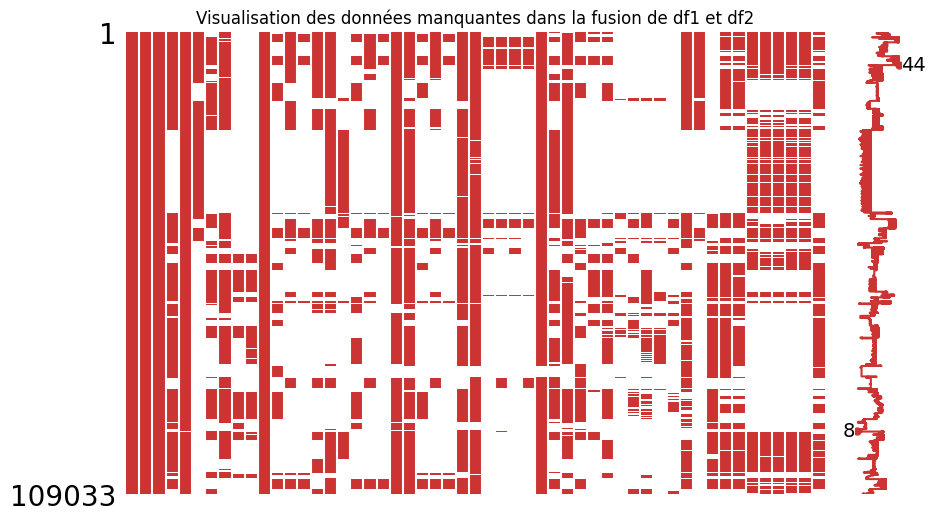

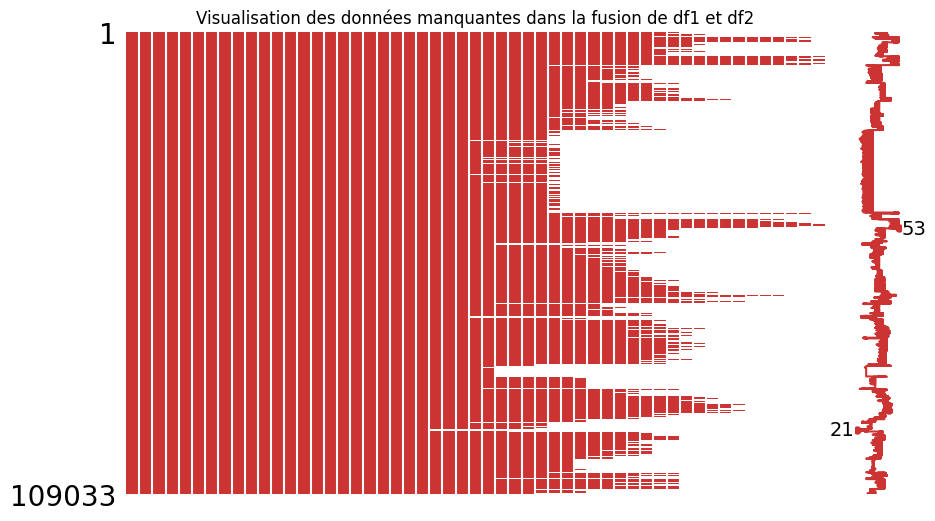

In [ ]:
# Visualiser les données manquantes avec missingno
msno.matrix(df1, figsize=(10, 6), color=(0.8, 0.2, 0.2))  # Rouge pour les valeurs manquantes
plt.title('Visualisation des données manquantes dans la fusion de df1 et df2')
plt.show()

msno.matrix(df2, figsize=(10, 6), color=(0.8, 0.2, 0.2))  # Rouge pour les valeurs manquantes
plt.title('Visualisation des données manquantes dans la fusion de df1 et df2')
plt.show()





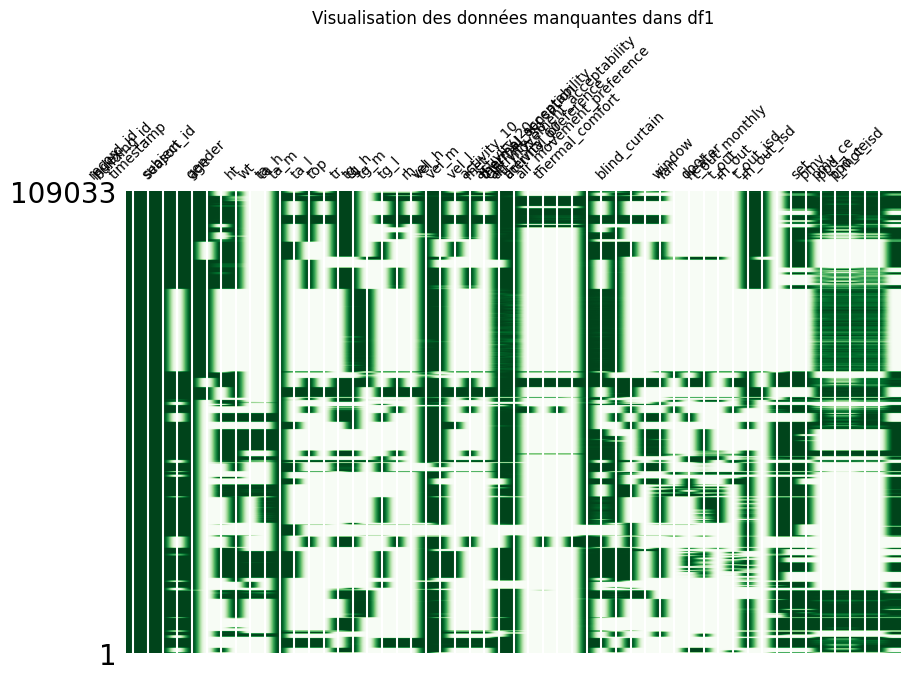

In [ ]:
# Créer un masque pour les données remplies
filled_mask = df1.notnull()

# Visualiser les données manquantes avec missingno
msno.matrix(df1, figsize=(10, 6), sparkline=False)  # Ne spécifiez pas color ici

# Appliquer la couleur verte pour les données remplies
plt.imshow(filled_mask, cmap='Greens', aspect='auto', extent=(0, filled_mask.shape[1], 0, filled_mask.shape[0]))

plt.title('Visualisation des données manquantes dans df1')

# Ajouter les noms de colonnes
plt.xticks(range(df1.shape[1]), df1.columns, rotation=45, ha='right')
plt.show()

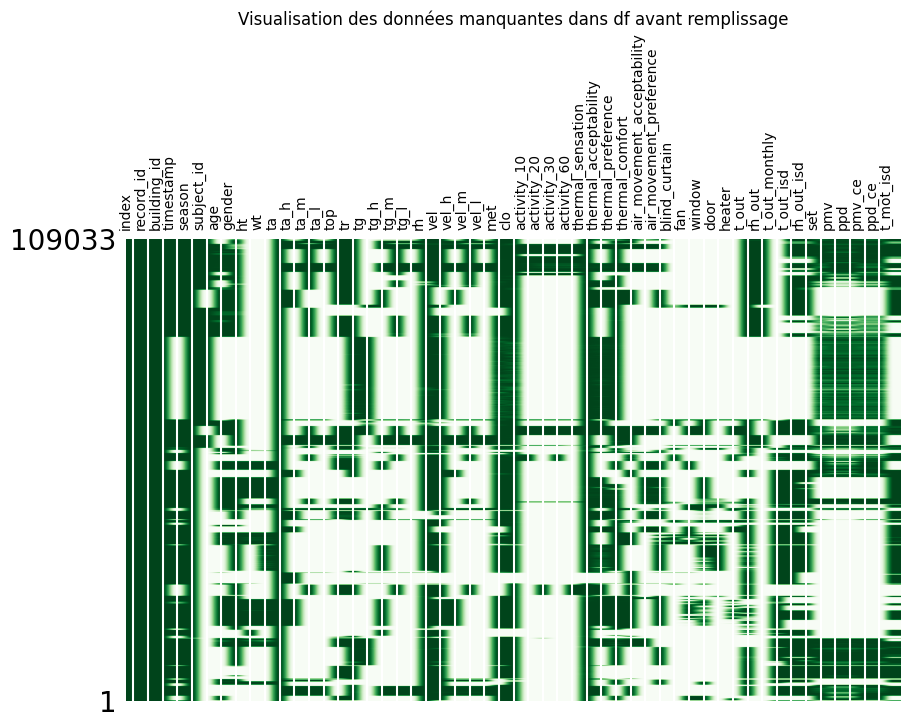

In [ ]:
# Créer un masque pour les données remplies
filled_mask = df1.notnull()

# Visualiser les données manquantes avec missingno
msno.matrix(df1, figsize=(10, 6), sparkline=False)  # Ne spécifiez pas color ici

# Ajouter la couleur rouge pour les données manquantes
plt.imshow(~filled_mask, cmap='Reds', aspect='auto', extent=(0, filled_mask.shape[1], 0, filled_mask.shape[0]))

# Ajouter la couleur verte pour les données remplies
plt.imshow(filled_mask, cmap='Greens', aspect='auto', extent=(0, filled_mask.shape[1], 0, filled_mask.shape[0]))

plt.title('Visualisation des données manquantes dans df avant remplissage')

# Ajouter les noms de colonnes avec rotation à 90 degrés
plt.xticks(range(df1.shape[1]), df1.columns, rotation=90, ha='center')
plt.show()

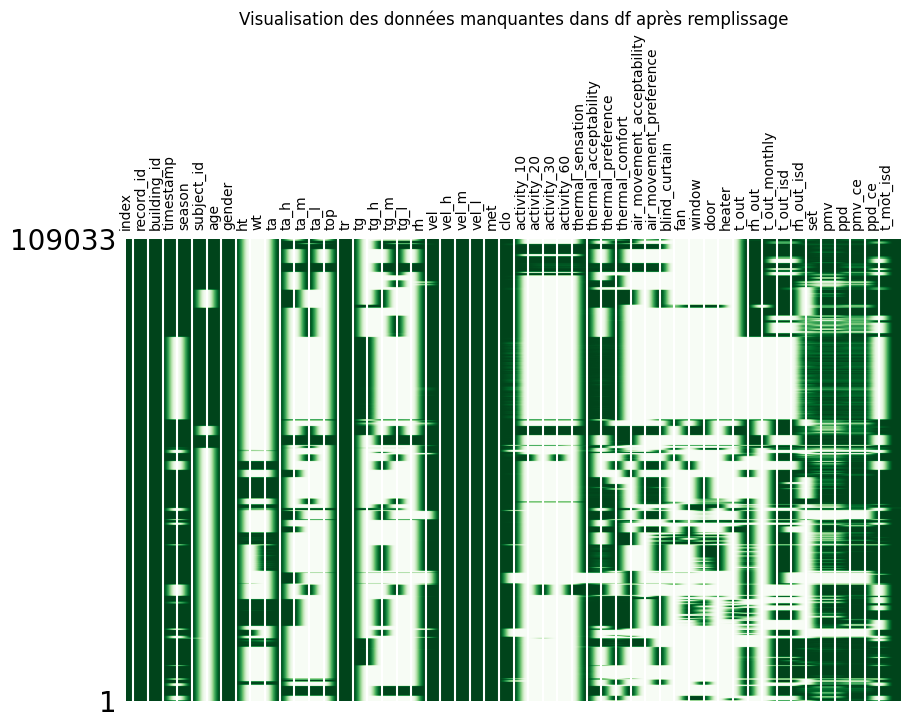

In [ ]:
# Éliminer les 6 dernières colonnes
dfsupp2 = df2.iloc[:, :-5]

# Créer un masque pour les données remplies
filled_mask = dfsupp2.notnull()

# Visualiser les données manquantes avec missingno
msno.matrix(dfsupp2, figsize=(10, 6), sparkline=False)  # Ne spécifiez pas color ici

# Ajouter la couleur rouge pour les données manquantes
plt.imshow(~filled_mask, cmap='Reds', aspect='auto', extent=(0, filled_mask.shape[1], 0, filled_mask.shape[0]))

# Ajouter la couleur verte pour les données remplies
plt.imshow(filled_mask, cmap='Greens', aspect='auto', extent=(0, filled_mask.shape[1], 0, filled_mask.shape[0]))

plt.title('Visualisation des données manquantes dans df après remplissage')

# Ajouter les noms de colonnes avec rotation à 90 degrés
plt.xticks(range(df1.shape[1]), df1.columns, rotation=90, ha='center')
plt.show()

In [ ]:
# Calculer la somme des valeurs manquantes dans chaque colonne pour df1
sum_missing_df1 = df1.isnull().sum()

# Calculer la somme des valeurs manquantes dans chaque colonne pour df2
sum_missing_df2 = dfsupp2.isnull().sum()

# Calculer la différence des valeurs manquantes entre df1 et df2
difference_sum_missing = sum_missing_df2 - sum_missing_df1

print(difference_sum_missing)

activity_10                       0.0
activity_20                       0.0
activity_30                       0.0
activity_60                       0.0
age                          -60039.0
air_movement_acceptability        0.0
air_movement_preference           0.0
blind_curtain                     0.0
building_id                       0.0
clo                               0.0
door                              0.0
fan                               0.0
gender                       -38769.0
heater                            0.0
ht                                0.0
index                             0.0
met                          -14687.0
pmv                          -34072.0
pmv_ce                       -37673.0
ppd                          -34072.0
ppd_ce                       -37673.0
record_id                         0.0
region                            NaN
rh                                0.0
rh_out                            0.0
rh_out_isd                        0.0
season      